<a href="https://colab.research.google.com/github/priyankakumari123/R_code/blob/master/Titanic__Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from numpy.random import seed
seed(10)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

print(__doc__)


Automatically created module for IPython interactive environment


In [0]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
print(train.shape)

(891, 12)


In [0]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train[['PassengerId','Pclass','Age','SibSp','Parch','Fare']].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
def bargraph(feature):
    survived= train[train['Survived']==1][feature].value_counts()
    dead= train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,dead])
    df.index= ('survived','dead')
    df.plot(kind='bar',stacked=True)

In [0]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

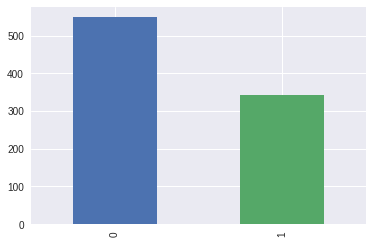

In [0]:
train['Survived'].value_counts().plot(kind='bar')

In [0]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

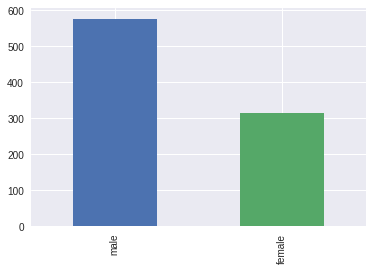

In [0]:
train['Sex'].value_counts().plot(kind='bar')

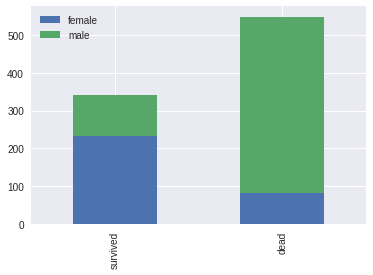

In [0]:
bargraph('Sex')

In [0]:
train['Survived'].value_counts()*100/len(train)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [0]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

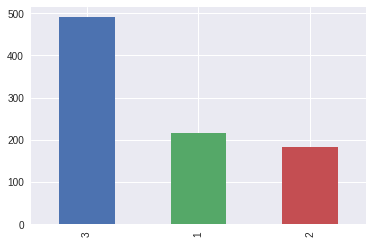

In [0]:
train['Pclass'].value_counts().plot(kind='bar')

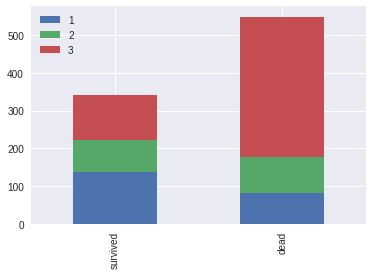

In [0]:
bargraph('Pclass')

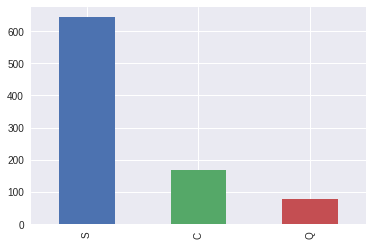

In [0]:
train['Embarked'].value_counts().plot(kind='bar')

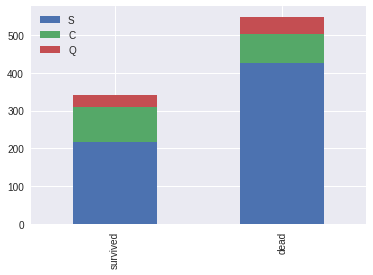

In [0]:
bargraph('Embarked')

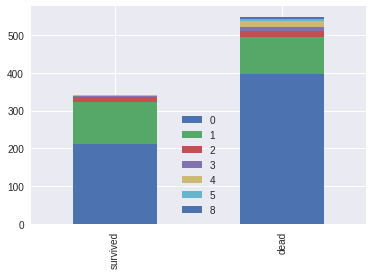

In [0]:
bargraph('SibSp')

In [0]:
titanic = [train, test] # combining train and test dataset

for dataset in titanic:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [0]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Jonkheer      1
Countess      1
Don           1
Sir           1
Ms            1
Capt          1
Lady          1
Name: Title, dtype: int64

In [0]:

test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [0]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for dataset in titanic:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


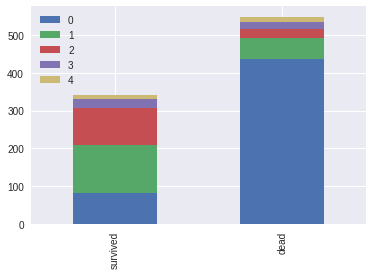

In [0]:
bargraph('Title')

In [0]:
train.replace(['male','female'],[0,1],inplace=True)
test.replace(['male','female'],[0,1],inplace=True)

In [0]:
# filling missing age with median age for each title 
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [0]:
#making Age to categorical variable
for dataset in titanic:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0


In [0]:
for dataset in titanic:
    dataset['family_size']= dataset['SibSp']+dataset['Parch']+1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0,1


In [0]:
train['Embarked'].value_counts()
#train['Embarked'].fillna(train['Embarked'].mode())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
for dataset in titanic:
    dataset['Embarked']= dataset['Embarked'].fillna('S')

In [0]:
for dataset in titanic:
    dataset['Embarked'] = dataset['Embarked'].replace(['S','C','Q'],[0,1,2])

In [0]:
train.isnull().sum()
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
# making Fare numerical to categorical 
for dataset in titanic:
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0,
    dataset.loc[ dataset['Fare'] > 10 & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3                                          

In [0]:

test.Fare.fillna(value= 1,inplace= True) 
  

In [0]:
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
E101               3
F2                 3
C22 C26            3
D                  3
B22                2
E33                2
C124               2
D17                2
B77                2
F G73              2
D36                2
E121               2
B51 B53 B55        2
D26                2
B18                2
E67                2
E25                2
C78                2
D20                2
C123               2
B57 B59 B63 B66    2
B58 B60            2
C2                 2
B20                2
C126               2
C52                2
                  ..
C106               1
A6                 1
D10 D12            1
C111               1
B94                1
D46                1
D49                1
E68                1
D11                1
B4                 1
C91                1
E63                1
C87                1
C30                1
F38                1
A36                1
B37          

In [0]:
for dataset in titanic:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [0]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [0]:
train = train.drop(['PassengerId','Name','SibSp', 'Parch','Ticket','Cabin'], axis=1)
test = test.drop(['PassengerId','Name','SibSp', 'Parch','Ticket','Cabin'], axis=1)


In [0]:
X = train.drop('Survived', axis=1)
#target = train['Survived']

In [0]:
X.shape

(891, 7)

In [0]:
y= train['Survived']

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)


In [0]:
X_test.shape

(179, 7)

In [0]:
test.shape

(418, 7)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

Grid scores on development set:

0.796 (+/-0.069) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.789 (+/-0.060) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.813 (+/-0.062) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.789 (+/-0.051) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.796 (+/-0.047) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.781 (+/-0.071) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.812 (+/-0.070) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 10, 'p':

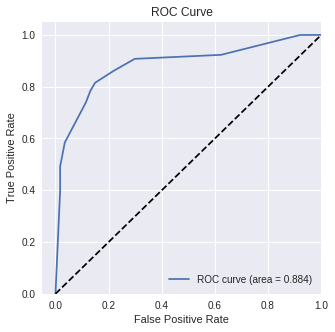

In [0]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters_knn = [{'n_neighbors': [5,10], 'weights': ['uniform','distance'],
                     'algorithm': ['brute','auto'], 'p': [1],'metric':['euclidean','minkowski']}
                    ]
scores = ['accuracy']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knn, cv=10, scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'priors': (0.7, 0.3)}

Grid scores on development set:

0.808 (+/-0.050) for {'priors': (0.7, 0.3)}
0.770 (+/-0.038) for {'priors': (0.4, 0.6)}
0.805 (+/-0.047) for {'priors': (0.9, 0.1)}
0.719 (+/-0.094) for {'priors': (0.2, 0.8)}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.88      0.84      0.86       114
          1       0.74      0.80      0.77        65

avg / total       0.83      0.83      0.83       179

Detailed confusion matrix:
[[96 18]
 [13 52]]
Accuracy Score: 

0.8268156424581006
ROC AUC: 0.861


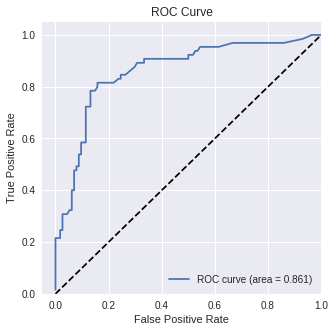

In [0]:
# GaussianNB classifier
from sklearn.naive_bayes import GaussianNB

tuned_parameters_GNB = [{'priors':[(0.7,0.3),(0.4,0.6),(0.9,0.1),(0.2,0.8)]}]
                    
scores = ['accuracy']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
clf = GridSearchCV(GaussianNB(), tuned_parameters_GNB, cv=10, scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 19, 'tol': 0.0001}

Grid scores on development set:

0.803 (+/-0.072) for {'C': 10, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 19, 'tol': 0.0001}
0.803 (+/-0.072) for {'C': 10, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 19, 'tol': 1e-06}
0.803 (+/-0.072) for {'C': 10, 'max_iter': 150, 'multi_class': 'ovr', 'random_state': 19, 'tol': 0.0001}
0.803 (+/-0.072) for {'C': 10, 'max_iter': 150, 'multi_class': 'ovr', 'random_state': 19, 'tol': 1e-06}
0.803 (+/-0.072) for {'C': 100, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 19, 'tol': 0.0001}
0.803 (+/-0.072) for {'C': 100, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 19, 'tol': 1e-06}
0.803 (+/-0.072) for {'C': 100, 'max_iter': 150, 'multi_class': 'ovr', 'random_state': 19, 'tol': 0.0001}
0.803 (+/-0.072) for {'C': 100, 'max_iter': 150, 'multi_clas

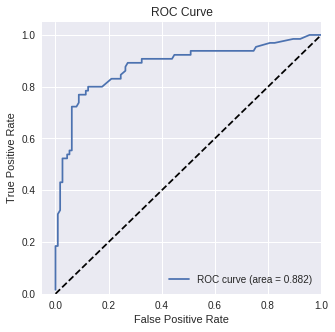

In [0]:
# LogisticRegression classifier
from sklearn.linear_model import LogisticRegression

tuned_parameters_LR = [{'C': [ 10, 100,1000], 'max_iter': [100,150], 'multi_class':['ovr'], 'tol':[1e-4,1e-6],
                         'random_state':[19]}]
scores = ['accuracy']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
clf = GridSearchCV(LogisticRegression(), tuned_parameters_LR, cv=10, scoring='%s' % score)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))
 
# false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
 
# AUC calculation

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# ROC curve
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print()


{'max_depth': [1, 2, 3, 5, 10], 'min_samples_split': [2, 3, 4, 5, 10], 'max_leaf_nodes': [2, 3, 5, 10, 15], 'min_samples_leaf': [2, 5, 10, 15], 'random_state': [11]}
# Tuning hyper-parameters for accuracy

Best parameters 

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 11}

Grid scores on development set:

0.779 (+/-0.034) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 11}
0.779 (+/-0.034) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 11}
0.779 (+/-0.034) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 4, 'random_state': 11}
0.779 (+/-0.034) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 11}
0.779 (+/-0.034) for {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 11}
0.779

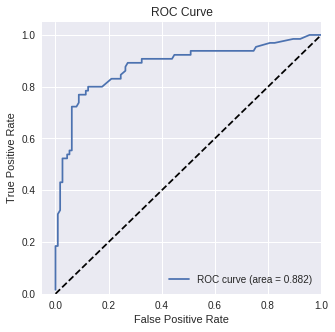

In [0]:
#DecisionTreeClassifier
# scores = ['accuracy']
#param_grid = {'max_depth': np.arange(1, 11)}
param_grid = {'max_depth':[1,2,3,5,10,],'min_samples_split':[2,3,4,5,10],'max_leaf_nodes':[2,3,5,10,15],
               'min_samples_leaf': [2,5,10,15],'random_state':[11]}
print(param_grid)
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    tree = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring='accuracy')
    tree.fit(X_train,y_train)
    print("Best parameters ")
    print()
    print(tree.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = tree.cv_results_['mean_test_score']
    stds = tree.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, tree.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, tree.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))
    # false positive and true positive rates
    FPR, TPR, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

    # AUC calculation

    roc_auc = auc(FPR, TPR)
    print ('ROC AUC: %0.3f' % roc_auc )

    # ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print()

In [0]:
# SVM classifier
tuned_parameters = [{'kernel': ['rbf', 'linear'], 'gamma': [0.01,0.1,1,2],
                     'C': [ 0.1, 1, 10,100], 'max_iter':[1000],'random_state':[10]}
                    ]
# We are going to limit ourselves to accuracy score, other options can be
# seen here:
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Some other values used are the predcision_macro, recall_macro
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))
    print()
    

# Tuning hyper-parameters for accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 10}

Grid scores on development set:

0.787 (+/-0.025) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 10}
0.791 (+/-0.023) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000, 'random_state': 10}
0.819 (+/-0.031) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 10}
0.791 (+/-0.023) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 1000, 'random_state': 10}
0.765 (+/-0.045) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 10}
0.791 (+/-0.023) for {'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1000, 'random_state': 10}
0.642 (+/-0.044) for {'C': 0.1, 'gamma': 2, 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 10}
0.791 (+/-0.023) for {'C': 0.1, 'gamma': 2, 'kernel': 'linear', 'max_iter': 1000, 'random_state': 10}
0.791 (+/-0.023) for {'C': 

In [0]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier

scores = ['accuracy']
parameters={'learning_rate': ["constant", "invscaling", "adaptive"],'hidden_layer_sizes': [10,20,10,15],'alpha': [0.001,0.01,0.1,1],'activation': ["identity","logistic", "relu", "tanh"], 'random_state':[11]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    n_net = GridSearchCV(MLPClassifier(), parameters,scoring='accuracy')
    n_net.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    print()
    print(n_net.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = n_net.cv_results_['mean_test_score']
    stds = n_net.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, n_net.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, n_net.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))
    
    

# Tuning hyper-parameters for accuracy



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'random_state': 11}

Grid scores on development set:

0.816 (+/-0.045) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'random_state': 11}
0.816 (+/-0.045) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate': 'invscaling', 'random_state': 11}
0.816 (+/-0.045) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate': 'adaptive', 'random_state': 11}
0.803 (+/-0.046) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'random_state': 11}
0.803 (+/-0.046) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'learning_rate': 'invscaling', 'random_state': 11}
0.803 (+/-0.046) for {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': 20, 'learning_rate': 'ad

In [0]:
# Titanic test datahas been evaluated on MLP classifier 
#as It is maximum accuracy of 86.6%
Testing= n_net.predict(test)
print(Testing)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}

Grid scores on development set:

0.824 (+/-0.032) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.820 (+/-0.038) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
0.823 (+/-0.030) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.827 (+/-0.038) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.823 (+/-0.025) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, '

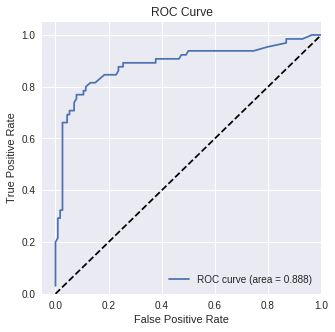

In [0]:
#Random_forest classifier
from sklearn.ensemble import RandomForestClassifier

scores = ['accuracy']
parameters = {'n_estimators': [50,70,100], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [ 5, 10,20], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,10]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    Rand_Forest = GridSearchCV(RandomForestClassifier(), parameters,scoring='accuracy')
    Rand_Forest.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    print()
    print(Rand_Forest.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = Rand_Forest.cv_results_['mean_test_score']
    stds =  Rand_Forest.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, Rand_Forest.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test,Rand_Forest.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))
    # false positive and true positive rates
    FPR, TPR, _ = roc_curve(y_test, Rand_Forest.predict_proba(X_test)[:,1])

    # AUC calculation

    roc_auc = auc(FPR, TPR)
    print ('ROC AUC: %0.3f' % roc_auc )

    # ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print()


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'learning_rate': 1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}

Grid scores on development set:

0.764 (+/-0.032) for {'learning_rate': 1, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1000}
0.775 (+/-0.043) for {'learning_rate': 1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
0.771 (+/-0.038) for {'learning_rate': 1, 'max_depth': 5, 'max_features': 4, 'n_estimators': 1000}
0.534 (+/-0.346) for {'learning_rate': 2, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1000}
0.490 (+/-0.276) for {'learning_rate': 2, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
0.583 (+/-0.150) for {'learning_rate': 2, 'max_depth': 5, 'max_features': 4, 'n_estimators': 1000}
0.475 (+/-0.370) for {'learning_rate': 5, 'max_depth': 3, 'max_features': 4, 'n_estimators': 1000}
0.529 (+/-0.285) for {'learning_rate': 5, 'max_depth': 4, 'max_features': 4, 'n_estimators': 1000}
0.503 (+/

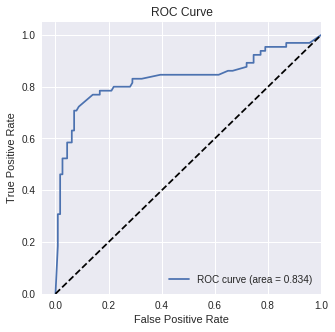

In [0]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

tuned_parameters_GBC = [{'n_estimators': [1000], 'learning_rate': [1,2,5],
                     'max_features': [4], 'max_depth' : [3,4,5]}
                    ]
scores = ['accuracy']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters_GBC, cv=5, scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Detailed confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("Accuracy Score: \n")
print(accuracy_score(y_true, y_pred))
# false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
 
# AUC calculation

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# ROC curve
plt.figure(figsize=(5,5))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print()

In [0]:
#Neural_Net
# hidden layers
model= Sequential()
model.add(Dense(8))
model.add(Activation("sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation("sigmoid"))
model.add(Dropout(0.2))
    

    
model.add(Dense(2, activation="sigmoid"))
    
# output layer
model.add(Dense(1, activation='sigmoid'))

In [0]:
# model compile for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
Ann= model.fit(X_train, y_train, validation_data=(X_test,y_test),nb_epoch=1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
plt.plot(Ann.history['loss'])
plt.plot(Ann.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# summarize history for accuracy
plt.plot(Ann.history['acc'])
plt.plot(Ann.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Xgboost classifier
scores = ['accuracy']

params = {'learning_rate':[0.01,0.05],'n_estimators':[100,150,200],'max_delta_step':[1,4,7],'seed':[1234,70030]}
                  
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    xgb = xgb.XGBClassifier()
    XGB = GridSearchCV(xgb, param_grid=params, scoring='accuracy', cv=10 )
    XGB.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    print()
    print(XGB.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = XGB.cv_results_['mean_test_score']
    stds =  XGB.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds,  XGB.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, XGB.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Detailed confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy Score: \n")
    print(accuracy_score(y_true, y_pred))

    print()
